# Display protocols for $I_\mathrm{Na}$ experiments

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import myokit
from ionchannelABC.experiment import setup

## $I_\mathrm{Na}$

In [3]:
from experiments.ina_sakakibara import (sakakibara_act,
                                        sakakibara_inact,
                                        sakakibara_inact_kin,
                                        sakakibara_rec)
from experiments.ina_schneider import schneider_taum

In [4]:
# courtemanche model to demonstrate current output from protocol
modelfile = 'models/courtemanche_ina.mmt'

In [5]:
from ionchannelABC.visualization import plot_experiment_traces

In [6]:
# Functions to extract a portion of the trace from experiments
def split_act(data):
    out = []
    for d in data.split_periodic(11000, adjust=True):
        d = d.trim(9990, 11000, adjust=False)
        out.append(d)
    return out
def split_act_tau(data):
    out = []
    for d in data.split_periodic(10012, adjust=True):
        d = d.trim(9990, 10012, adjust=False)
        out.append(d)
    return out
def split_inact(data):
    out = []
    for d in data.split_periodic(11030, adjust=True):
        d = d.trim(9990, 11030, adjust=False)
        out.append(d)
    return out
def split_inact_tau(data):
    out = []
    for d in data.split_periodic(10100, adjust=True):
        d = d.trim(9990, 10100, adjust=False)
        out.append(d)
    return out
def split_rec(data):
    twaits = [2**i for i in range(1,11)]
    experiment_length = (10000+2*1000)*len(twaits)+sum(twaits)
    out = []
    # only need one experiment as example
    data = data.trim_right(experiment_length)
    cnt = 0
    for t in twaits:
        d = data.trim(cnt, cnt+12000+t, adjust=True)
        d = d.trim(9990, 12000+t, adjust=False)
        cnt += 12000+t
        out.append(d)
    return out

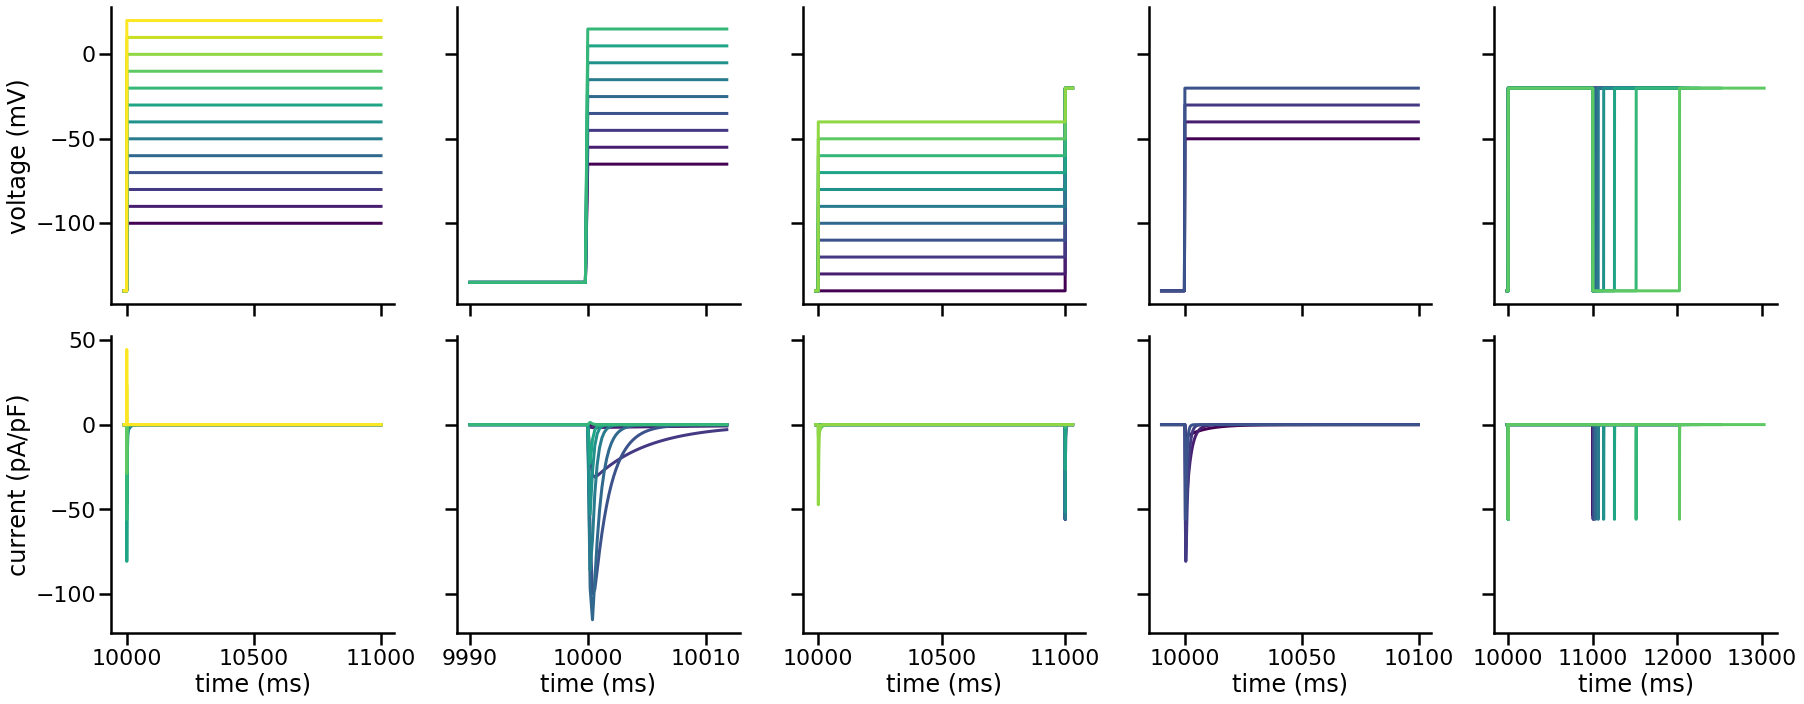

In [14]:
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_experiment_traces(modelfile, ['ina.i_Na'], 
                           [split_act, split_act_tau, split_inact, split_inact_tau, split_rec],
                           sakakibara_act,
                           schneider_taum,
                           sakakibara_inact,
                           sakakibara_inact_kin,
                           sakakibara_rec,
                           log_interval=0.2,
                           timevar='engine.time')

xlabel = "time (ms)"
ylabels = ["voltage (mV)", "current (pA/pF)"]
for ax in g.axes[1,:]:
    ax.set_xlabel(xlabel)
for ax, yl in zip(g.axes, ylabels):
    ax[0].set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title('')
    
plt.tight_layout()

In [16]:
#g.savefig('figures/ina/ina_protocols.pdf')

## $I_\mathrm{CaL}$

In [17]:
from experiments.ical_mewes import mewes_act
from experiments.ical_li import (li_act_and_tau,
                                 li_inact_1000,
                                 li_inact_kin_80,
                                 li_recov)
from experiments.ical_sun import (sun_inact_kin)

In [18]:
# courtemanche model to demonstrate current output from protocol
modelfile = 'models/nygren_ical.mmt'

In [19]:
# Functions to extract a portion of the trace from experiments
def split_mewes_act(data):
    out = []
    for d in data.split_periodic(10450, adjust=True):
        d = d.trim(9990, 10450, adjust=False)
        out.append(d)
    return out
def split_li_act(data):
    out = []
    for d in data.split_periodic(10300, adjust=True):
        d = d.trim(9990, 10300, adjust=False)
        out.append(d)
    return out
def split_inact(data):
    out = []
    for d in data.split_periodic(11300, adjust=True):
        d = d.trim(9990, 11300, adjust=False)
        out.append(d)
    return out
def split_li_inact_tau(data):
    out = []
    for d in data.split_periodic(10300, adjust=True):
        d = d.trim(9990, 10300, adjust=False)
        out.append(d)
    return out
def split_sun_inact_tau(data):
    out = []
    for d in data.split_periodic(11000, adjust=True):
        d = d.trim(9990, 11000, adjust=False)
        out.append(d)
    return out
def split_rec(data):
    twaits = [2**i for i in range(1,12)]
    experiment_length = (10000+2*300)*len(twaits)+sum(twaits)
    out = []
    # only need one experiment as example
    data = data.trim_right(experiment_length)
    cnt = 0
    for t in twaits:
        d = data.trim(cnt, cnt+10600+t, adjust=True)
        d = d.trim(9990, 10600+t, adjust=False)
        cnt += 10600+t
        out.append(d)
    return out

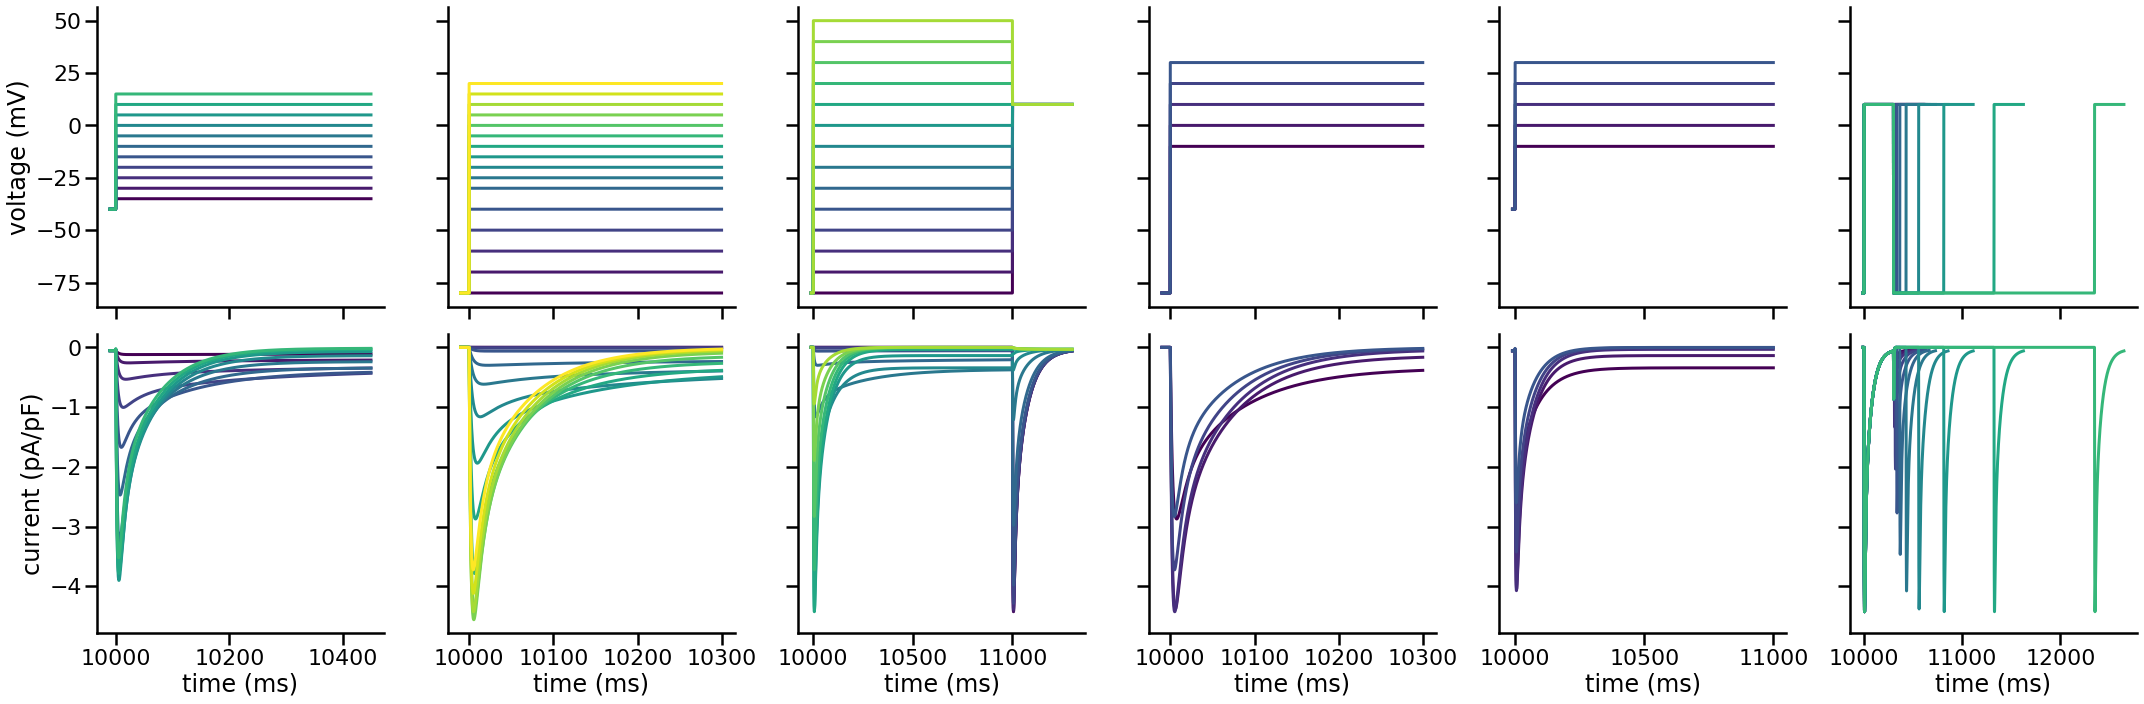

In [20]:
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_experiment_traces(modelfile, ['ical.i_CaL'], 
                           [split_mewes_act, 
                            split_li_act, 
                            split_inact, 
                            split_li_inact_tau, 
                            split_sun_inact_tau,
                            split_rec],
                           mewes_act,
                           li_act_and_tau,
                           li_inact_1000,
                           li_inact_kin_80,
                           sun_inact_kin,
                           li_recov,
                           log_interval=0.2,
                           timevar='engine.time')

xlabel = "time (ms)"
ylabels = ["voltage (mV)", "current (pA/pF)"]
for ax in g.axes[1,:]:
    ax.set_xlabel(xlabel)
for ax, yl in zip(g.axes, ylabels):
    ax[0].set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title('')
    
plt.tight_layout()

In [22]:
#g.savefig('figures/ical/ical_protocols.pdf')

## $I_\mathrm{to}$

In [23]:
from experiments.ito_shibata import (shibata_act)
from experiments.ito_wang import (wang_act, wang_inact)
from experiments.ito_courtemanche import (courtemanche_act_kin,
                                          courtemanche_deact,
                                          courtemanche_inact_kin,
                                          courtemanche_rec)
from experiments.ito_firek import (firek_inact)
from experiments.ito_nygren import (nygren_inact_kin,
                                    nygren_rec)

In [24]:
# courtemanche model to demonstrate current output from protocol
modelfile = 'models/nygren_ito.mmt'

In [25]:
# Functions to extract a portion of the trace from experiments
def split_shibata_act(data):
    out = []
    for d in data.split_periodic(20115, adjust=True):
        d = d.trim(19990, 20115, adjust=False)
        out.append(d)
    return out
def split_wang_act(data):
    out = []
    for d in data.split_periodic(11000, adjust=True):
        d = d.trim(9990, 11000, adjust=False)
        out.append(d)
    return out
def split_act_tau(data):
    out = []
    for d in data.split_periodic(20100, adjust=True):
        d = d.trim(19990, 20100, adjust=False)
        out.append(d)
    return out
def split_deact_tau(data):
    out = []
    for d in data.split_periodic(20110, adjust=True):
        d = d.trim(19990, 20110, adjust=False)
        out.append(d)
    return out
def split_firek_inact(data):
    out = []
    for d in data.split_periodic(20800, adjust=True):
        d = d.trim(19990, 20800, adjust=False)
        out.append(d)
    return out
def split_wang_inact(data):
    out = []
    for d in data.split_periodic(22000, adjust=True):
        d = d.trim(19990, 22000, adjust=False)
        out.append(d)
    return out
def split_nygren_inact_kin(data):
    out = []
    for d in data.split_periodic(20400, adjust=True):
        d = d.trim(19990, 20400, adjust=False)
        out.append(d)
    return out
def split_courtemanche_inact_kin(data):
    out = []
    for d in data.split_periodic(20100, adjust=True):
        d = d.trim(19990, 20100, adjust=False)
        out.append(d)
    return out
def split_nygren_rec(data):
    twaits = [2**i for i in range(1,8)]
    experiment_length = (20000+2*100)*len(twaits)+sum(twaits)
    out = []
    # only need one experiment as example
    data = data.trim_right(experiment_length)
    cnt = 0
    for t in twaits:
        d = data.trim(cnt, cnt+20200+t, adjust=True)
        d = d.trim(19990, 20200+t, adjust=False)
        cnt += 20200+t
        out.append(d)
    return out
def split_courtemanche_rec(data):
    twaits = [2**i for i in range(1,8)]
    experiment_length = (20000+2*200)*len(twaits)+sum(twaits)
    out = []
    # only need one experiment as example
    data = data.trim_right(experiment_length)
    cnt = 0
    for t in twaits:
        d = data.trim(cnt, cnt+20400+t, adjust=True)
        d = d.trim(19990, 20400+t, adjust=False)
        cnt += 20400+t
        out.append(d)
    return out

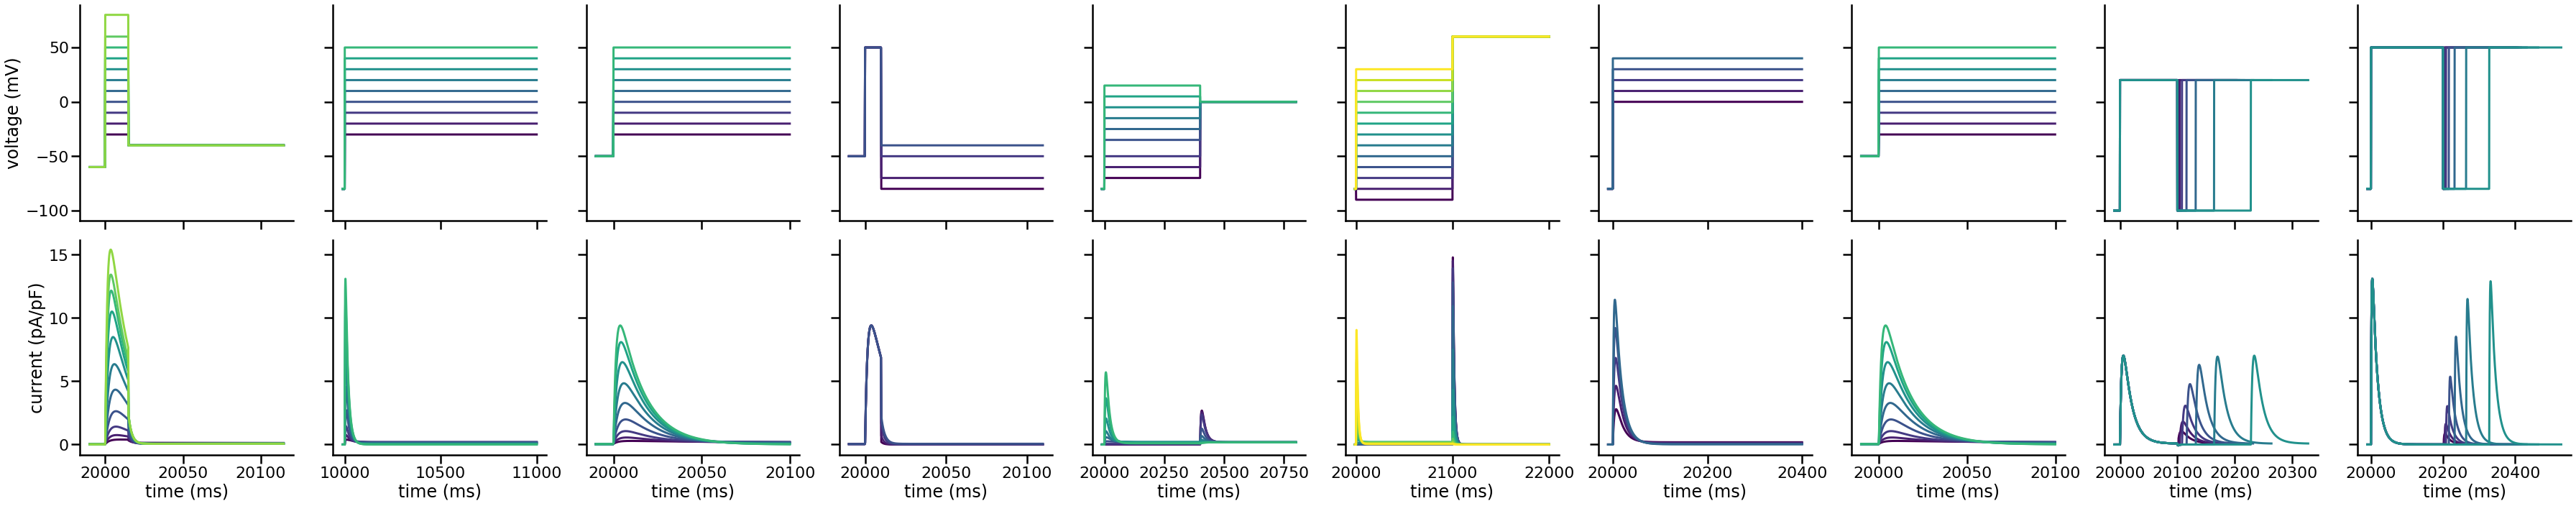

In [26]:
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_experiment_traces(modelfile, ['ito.i_to'], 
                           [split_shibata_act, 
                            split_wang_act,
                            split_act_tau,
                            split_deact_tau,
                            split_firek_inact,
                            split_wang_inact,
                            split_nygren_inact_kin,
                            split_courtemanche_inact_kin,
                            split_nygren_rec,
                            split_courtemanche_rec],
                           shibata_act,
                           wang_act,
                           courtemanche_act_kin,
                           courtemanche_deact,
                           firek_inact,
                           wang_inact,
                           nygren_inact_kin,
                           courtemanche_inact_kin,
                           nygren_rec,
                           courtemanche_rec,
                           log_interval=0.2,
                           timevar='engine.time')

xlabel = "time (ms)"
ylabels = ["voltage (mV)", "current (pA/pF)"]
for ax in g.axes[1,:]:
    ax.set_xlabel(xlabel)
for ax, yl in zip(g.axes, ylabels):
    ax[0].set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title('')
    
plt.tight_layout()

In [28]:
#g.savefig('figures/ito/ito_protocols.pdf')

## $I_\mathrm{Kur}$

In [29]:
from experiments.isus_wang import (wang_act, wang_inact)
from experiments.isus_courtemanche import (courtemanche_deact,
                                           courtemanche_inact_kin)
from experiments.isus_firek import (firek_inact)
from experiments.isus_nygren import (nygren_inact_kin,
                                     nygren_rec)

In [30]:
# courtemanche model to demonstrate current output from protocol
modelfile = 'models/nygren_isus.mmt'

In [31]:
# Functions to extract a portion of the trace from experiments
def split_wang_act(data):
    out = []
    for d in data.split_periodic(11220, adjust=True):
        d = d.trim(9990, 11220, adjust=False)
        out.append(d)
    return out
def split_deact_tau(data):
    out = []
    for d in data.split_periodic(20110, adjust=True):
        d = d.trim(19990, 20110, adjust=False)
        out.append(d)
    return out
def split_firek_inact(data):
    out = []
    for d in data.split_periodic(22900, adjust=True):
        d = d.trim(19990, 22900, adjust=False)
        out.append(d)
    return out
def split_wang_inact(data):
    out = []
    for d in data.split_periodic(23000, adjust=True):
        d = d.trim(19990, 23000, adjust=False)
        out.append(d)
    return out
def split_nygren_inact_kin(data):
    out = []
    for d in data.split_periodic(20400, adjust=True):
        d = d.trim(19990, 20400, adjust=False)
        out.append(d)
    return out
def split_courtemanche_inact_kin(data):
    out = []
    for d in data.split_periodic(22000, adjust=True):
        d = d.trim(19990, 22000, adjust=False)
        out.append(d)
    return out
def split_nygren_rec(data):
    twaits = [2**i for i in range(1,8)]
    experiment_length = (20000+2*100)*len(twaits)+sum(twaits)
    out = []
    # only need one experiment as example
    data = data.trim_right(experiment_length)
    cnt = 0
    for t in twaits:
        d = data.trim(cnt, cnt+20200+t, adjust=True)
        d = d.trim(19990, 20200+t, adjust=False)
        cnt += 20200+t
        out.append(d)
    return out

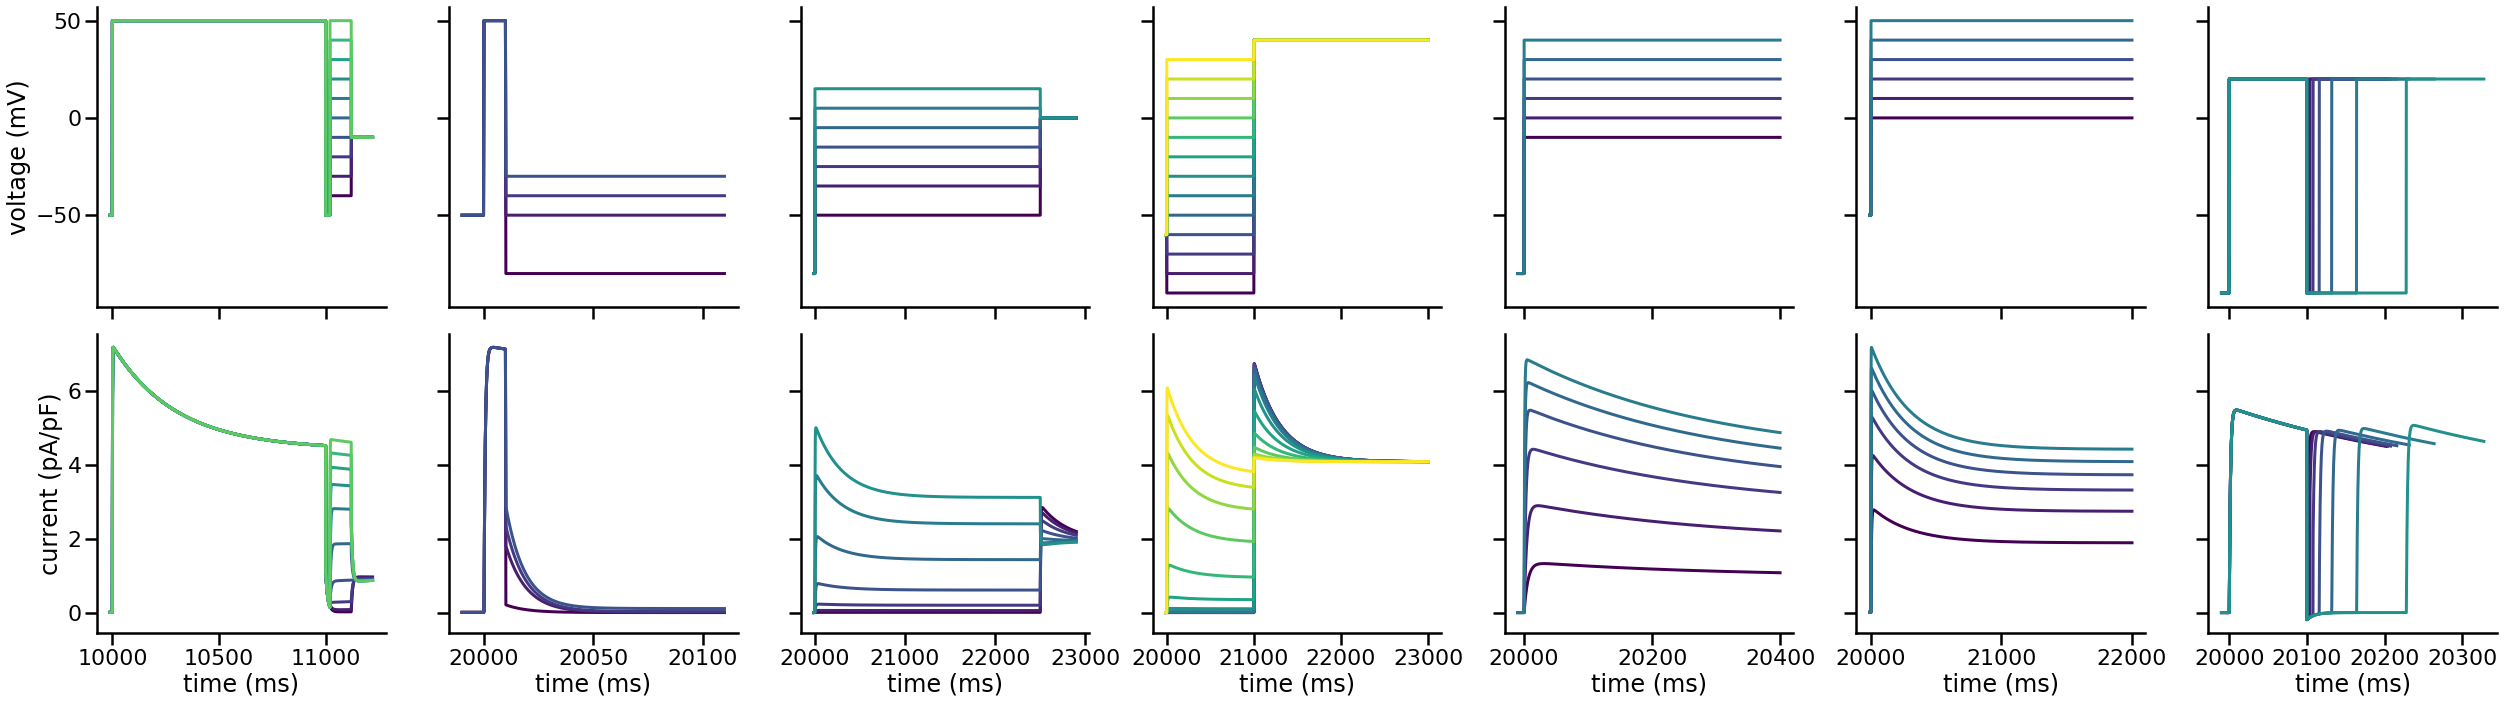

In [32]:
sns.set_context('poster')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_experiment_traces(modelfile, ['isus.i_sus'], 
                           [split_wang_act,
                            split_deact_tau,
                            split_firek_inact,
                            split_wang_inact,
                            split_nygren_inact_kin,
                            split_courtemanche_inact_kin,
                            split_nygren_rec],
                           wang_act,
                           courtemanche_deact,
                           firek_inact,
                           wang_inact,
                           nygren_inact_kin,
                           courtemanche_inact_kin,
                           nygren_rec,
                           log_interval=0.2,
                           timevar='engine.time')

xlabel = "time (ms)"
ylabels = ["voltage (mV)", "current (pA/pF)"]
for ax in g.axes[1,:]:
    ax.set_xlabel(xlabel)
for ax, yl in zip(g.axes, ylabels):
    ax[0].set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title('')
    
plt.tight_layout()

In [34]:
#g.savefig('figures/isus/isus_protocols.pdf')